In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
population = pd.read_csv("SD1970_population.csv")

In [66]:
def extract(x):
    x = x.split(" ")[2]
    return math.floor(float(x))

In [67]:
temp1 = population[["Census Tract Name", "Block Group", "Total persons"]]

temp2 = population[population.columns[85:95]]

Marriage_ratio = temp1.join(temp2)

Marriage_ratio["Census Tract Name"] = Marriage_ratio["Census Tract Name"].apply(extract)

Marriage_ratio = Marriage_ratio[Marriage_ratio["Total persons"]!="0"]
Marriage_ratio = Marriage_ratio.replace("...", "0")

for i in list(Marriage_ratio.columns[2:]):
    Marriage_ratio[i] = Marriage_ratio[i].str.replace(r'[^\w\s]+', '')

Marriage_ratio["Male persons now married (excludes separated)"] = Marriage_ratio["Male persons now married (excludes separated)"].astype(int)

for i in list(Marriage_ratio.columns[2:]):
    Marriage_ratio[i] = Marriage_ratio[i].astype(int)

Marriage_ratio["Married Men"] = Marriage_ratio.iloc[:, 3:4].sum(axis = 1)

Marriage_ratio["Other Men"] = Marriage_ratio.iloc[:, 4:8].sum(axis = 1)

Marriage_ratio["Married Women"] = Marriage_ratio.iloc[:, 8:9].sum(axis = 1)

Marriage_ratio["Other Women"] = Marriage_ratio.iloc[:, 9:13].sum(axis = 1)

Marriage_ratio = Marriage_ratio[["Census Tract Name", "Block Group", "Married Men", "Other Men", "Married Women","Other Women"]]

In [68]:
Marriage_ratio["Married Ratio"] = (Marriage_ratio["Married Men"] + Marriage_ratio["Married Women"])/(Marriage_ratio["Married Men"] + Marriage_ratio["Married Women"]+ Marriage_ratio["Other Men"]+Marriage_ratio["Other Women"])

In [69]:
Marriage_ratio["Married"] = Marriage_ratio["Married Men"] + Marriage_ratio["Married Women"]
Marriage_ratio["Other"] = Marriage_ratio["Other Men"] + Marriage_ratio["Other Women"]

In [70]:
Married = Marriage_ratio["Married"].sum()
Other = Marriage_ratio["Other"].sum()
Married

517116

In [71]:
graph = pd.DataFrame({'lab':["Married", "Other"],'val':[Married, Other]})

In [72]:
graph

,lab,val
0,Married,517116
1,Other,307862


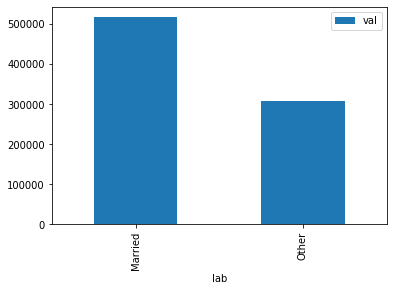

In [74]:
graph.plot.bar(x = 'lab')

In [45]:
Marriage_ratio = Marriage_ratio[["Census Tract Name", "Block Group", "Married Ratio"]]

Marriage_ratio = Marriage_ratio[Marriage_ratio["Married Ratio"] >= 0]